In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

In [4]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6697 - loss: 0.6224 - val_accuracy: 0.8600 - val_loss: 0.3518
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.8756 - loss: 0.3071 - val_accuracy: 0.8774 - val_loss: 0.3011
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.9106 - loss: 0.2323 - val_accuracy: 0.8824 - val_loss: 0.2907
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.9274 - loss: 0.1908 - val_accuracy: 0.8784 - val_loss: 0.2961
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.9369 - loss: 0.1672 - val_accuracy: 0.8788 - val_loss: 0.3014
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.9508 - loss: 0.1397 - val_accuracy: 0.8384 - val_loss: 0.4240
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.9621 - loss: 0.1191 - val_accuracy: 0.8764 - val_loss: 0.3357
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.9659 - loss: 0.1046 - va

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8559 - loss: 0.4448
Test Accuracy: 0.85


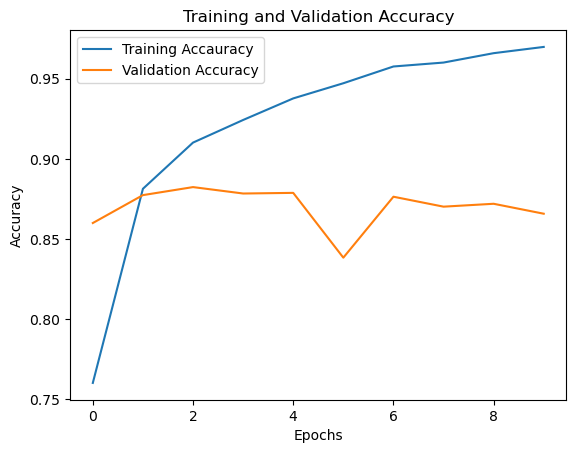

In [8]:
plt.plot(history.history['accuracy'], label="Training Accauracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()